<center> # Naiwny klasyfikator bayesowski</center>

Celem ćwiczenia jest zapoznanie się z technikami konstrukcji naiwnego klasywikatora bayesowskiego. 

Ćwiczenie oparte jest o artykuł z [linku](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)

In [190]:
import numpy as np
import pandas as pd 
# import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from copy import deepcopy



Na początku proszę wczytać plik __data.csv__ używając jako separatora ',':

In [191]:
df = pd.read_csv('data.csv', sep=',', na_values=np.NaN)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


W następnie sprawdź które z kolumn zawierają dane tekstowe lub liczbowe. W tym celu sprawdź wartość  argumentu *dtype* z odpowiednim warunkiem:

In [192]:
categorical = [df.dtypes.index[inx] for inx, el in enumerate(df.dtypes) if el != 'int64']
print('Dane tektowe zawierają kolumny :\n\n', categorical)


Dane tektowe zawierają kolumny :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


Sprawdź czy dane w kolumnach nie zawierają braków a jeżeli tak uzupełnij je według znanych Ci metod:

In [193]:
df = df[(df['capital_gain'] != 0) | (df['capital_loss'] != 0)]
df.reset_index(drop=True)
df = df.dropna()
#df['bin_income'] = df['income'].map({' >50K' : 1,
#                                     ' <=50K' : 0})
df = df[df['workclass'] != ' ?']
df = df[df['native_country'] != ' ?']
df


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
23,43,Private,117037,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,2042,40,United-States,<=50K
32,45,Private,386940,Bachelors,13,Divorced,Exec-managerial,Own-child,White,Male,0,1408,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32515,66,Federal-gov,47358,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,3471,0,40,United-States,<=50K
32518,57,Local-gov,110417,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K
32538,38,Private,139180,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32548,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K


Na przygotowanych danych przeprowadź proces tworzenia zbiorów uczących i testowych, tak by klasyfikator rozpoznawał do której z grup w kolumnie 'income' należy opisywana osoba


In [194]:
X = df.drop(['income'], axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


Przy pomocy biblioteki [category_encoders](https://contrib.scikit-learn.org/category_encoders/) przeprowadź proces kodowania zmiennych tektowych z pozostałych kategorii na wartości liczbowe:

In [195]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship',
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

X_train

C:\Users\dkope\AppData\Roaming\Python\Python39\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\dkope\AppData\Roaming\Python\Python39\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\dkope\AppData\Roaming\Python\Python39\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\dkope\AppData\Roaming\Python\Python39\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\dkope\AppData\Roaming\Pytho

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,fnlwgt,education_1,...,native_country_27,native_country_28,native_country_29,native_country_30,native_country_31,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36
4810,40,1,0,0,0,0,0,0,179717,1,...,0,0,0,0,0,0,0,0,0,0
24067,38,0,1,0,0,0,0,0,478829,0,...,0,0,0,0,0,0,0,0,0,0
799,43,1,0,0,0,0,0,0,274363,1,...,0,0,0,0,0,0,0,0,0,0
11872,34,1,0,0,0,0,0,0,212064,0,...,0,0,0,0,0,0,0,0,0,0
28738,52,1,0,0,0,0,0,0,102828,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6760,41,1,0,0,0,0,0,0,48087,0,...,0,0,0,0,0,0,0,0,0,0
26943,39,0,0,0,0,1,0,0,180686,0,...,0,0,0,0,0,0,0,0,0,0
13547,54,0,0,0,0,1,0,0,185846,0,...,0,0,0,0,0,0,0,0,0,0
21489,58,1,0,0,0,0,0,0,136841,1,...,0,0,0,0,0,0,0,0,0,0


Używając [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) przeprowadź klasyfikację daych ze zbiorów testowych i treningowych. Podaj dokładnosć modelu i macierz błędu wraz z jej wykresem i interpretacją.

In [196]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

Model accuracy score: 0.7109
Training set score: 0.7117
Test set score: 0.7109


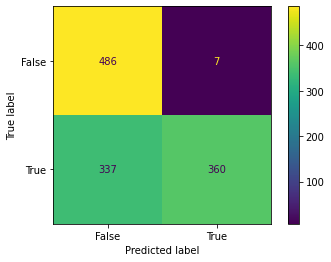

In [197]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()

Przprowadź uczenie klasyfikatora dla kolumn *race* i *native_country*. Podaj dokładnosć modeli i macierze błędu wraz z ich wykresami i interpretacją. Przedstaw wnioski od czego zależą otrzymane wyniki

race

In [198]:
X = df.drop(['race'], axis=1)
y = df['race']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [199]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship',
                                 'income', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

C:\Users\dkope\AppData\Roaming\Python\Python39\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\dkope\AppData\Roaming\Python\Python39\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\dkope\AppData\Roaming\Python\Python39\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\dkope\AppData\Roaming\Python\Python39\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\dkope\AppData\Roaming\Pytho

In [200]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

y_pred

array([' White', ' White', ' White', ..., ' White', ' White', ' White'],
      dtype='<U19')

Model accuracy score: 0.8849
Training set score: 0.8569
Test set score: 0.8849


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Amer-Indian-Eskimo'),
  Text(1, 0, 'Asian-Pac-Islander'),
  Text(2, 0, 'Black'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'White')])

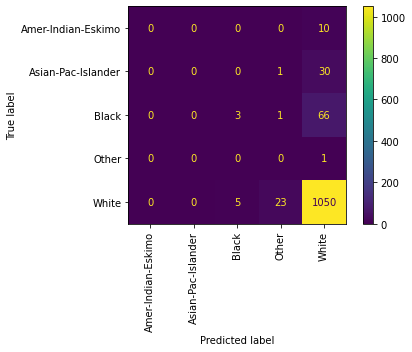

In [201]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White'])
cm_display.plot()
plt.xticks(rotation=90)

native_country

In [202]:
X = df.drop(['native_country'], axis=1)
y = df['native_country']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [203]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship',
                                 'income', 'sex', 'race'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

C:\Users\dkope\AppData\Roaming\Python\Python39\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\dkope\AppData\Roaming\Python\Python39\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\dkope\AppData\Roaming\Python\Python39\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\dkope\AppData\Roaming\Python\Python39\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\dkope\AppData\Roaming\Pytho

In [204]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

y_pred

array([' United-States', ' Portugal', ' United-States', ...,
       ' United-States', ' Trinadad&Tobago', ' United-States'],
      dtype='<U19')

Model accuracy score: 0.5849
Training set score: 0.5427
Test set score: 0.5849


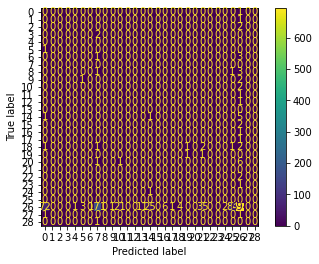

In [206]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()

Nie jestem do końca pewny czy autor pisząc 'Przprowadź uczenie klasyfikatora dla kolumn race i native_country' miał na myśli to co zaimplementowałem. Na podstawie samej
kolumny 'race' większość identyfikacja przypisywana jest rasie 'white' która dominuje w zbiorze (~~90%). Wyniki wyświetlone na confusion matrix pokazują, że zdecydowanie próbka ucząca zawierała zbyt mało innych wartości.
Wystarczy że model de-facto zakwalifikuje wszystkie rekordy jako 'white' i osiągnie wynik około 90%.

Co do rozpoznania dla kolumny native_country, to tutaj mam wątpliwość czy miało to być zrobione właśnie w ten sposób. Występuje zbyt dużo unikalnych
wartości dla kolumny native_country przez co confusion matrix jest nieczytelna i zawiera zbyt wiele komórek. Chociaż patrząc po wyniku jaki osiąga ten model, nie jest on totalnie beznadziejny - granice 60% przy tak dużej ilości możliwości a tak relatywnie małej próbce
uczącej wydaje się być wynikiem zadowalającym.